# This notebook analyzes the Twist for the rg and unmod for the central 12 steps around the lesion

## First of all, import usful libraries

In [11]:
%matplotlib inline

import numpy as np
import pandas as pd
import sys, getopt

from matplotlib import pyplot
from pylab import *
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_color_codes("pastel")
sns.set(style="darkgrid")

## Read data, first 6 columns are for rg; second 6 clumns are for unmod

In [12]:
df=pd.read_csv("./rg12_unmod12_twist", header=None, delim_whitespace=True).reset_index()

In [13]:
df[:5]

,index,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0,14.48,35.19,34.32,37.27,25.24,33.83,40.74,42.77,42.77,...,27.43,32.22,33.43,37.23,35.53,34.11,42.81,31.80,41.40,28.19
1,1,14.80,40.64,34.96,34.18,38.84,22.81,44.67,32.99,32.99,...,31.91,28.89,36.12,37.12,35.02,34.93,35.83,29.28,47.47,21.90
2,2,20.56,38.11,30.50,42.93,31.82,26.78,36.94,38.00,38.00,...,37.33,27.52,37.55,32.95,41.39,30.39,38.72,29.61,45.01,24.13
3,3,14.05,39.24,29.26,40.22,32.91,25.96,38.97,42.37,42.37,...,41.16,30.54,28.58,39.36,34.76,35.94,41.57,34.69,34.64,23.84
4,4,13.63,40.49,33.13,38.05,32.03,31.29,39.20,39.04,39.04,...,43.56,31.50,32.27,36.86,32.54,30.76,40.68,42.27,35.08,20.05


In [14]:
df.shape

(7000, 25)

## Create the column names; 6 for rg, 6 for unmod

In [19]:
list1=["index"]
list2=["rg"+str(x) for x in range(67,79)]
list3=["unmod"+str(x) for x in range(67,79)]
names= list1+list2+list3
print names

['index', 'rg67', 'rg68', 'rg69', 'rg70', 'rg71', 'rg72', 'rg73', 'rg74', 'rg75', 'rg76', 'rg77', 'rg78', 'unmod67', 'unmod68', 'unmod69', 'unmod70', 'unmod71', 'unmod72', 'unmod73', 'unmod74', 'unmod75', 'unmod76', 'unmod77', 'unmod78']


## Assign column names, and review the dataframe

In [20]:
df.columns=names
print df.shape
df[:5]
#print df.drop(df.columns[[0]], axis=1, inplace=True)

(7000, 25)


,index,rg67,rg68,rg69,rg70,rg71,rg72,rg73,rg74,rg75,...,unmod69,unmod70,unmod71,unmod72,unmod73,unmod74,unmod75,unmod76,unmod77,unmod78
0,0,14.48,35.19,34.32,37.27,25.24,33.83,40.74,42.77,42.77,...,27.43,32.22,33.43,37.23,35.53,34.11,42.81,31.80,41.40,28.19
1,1,14.80,40.64,34.96,34.18,38.84,22.81,44.67,32.99,32.99,...,31.91,28.89,36.12,37.12,35.02,34.93,35.83,29.28,47.47,21.90
2,2,20.56,38.11,30.50,42.93,31.82,26.78,36.94,38.00,38.00,...,37.33,27.52,37.55,32.95,41.39,30.39,38.72,29.61,45.01,24.13
3,3,14.05,39.24,29.26,40.22,32.91,25.96,38.97,42.37,42.37,...,41.16,30.54,28.58,39.36,34.76,35.94,41.57,34.69,34.64,23.84
4,4,13.63,40.49,33.13,38.05,32.03,31.29,39.20,39.04,39.04,...,43.56,31.50,32.27,36.86,32.54,30.76,40.68,42.27,35.08,20.05


In [21]:
print mean(df)

index      3499.500000
rg67         26.416313
rg68         36.906236
rg69         37.244953
rg70         33.747987
rg71         23.709100
rg72         36.819519
rg73         41.353036
rg74         36.349463
rg75         36.349463
rg76         33.272260
rg77         39.277746
rg78         24.763120
unmod67      29.684329
unmod68      38.425797
unmod69      31.903987
unmod70      33.026916
unmod71      33.646673
unmod72      37.521020
unmod73      32.176529
unmod74      37.358586
unmod75      34.444090
unmod76      33.387754
unmod77      39.574771
unmod78      28.611590
dtype: float64


# Preview a step far away from the lesion

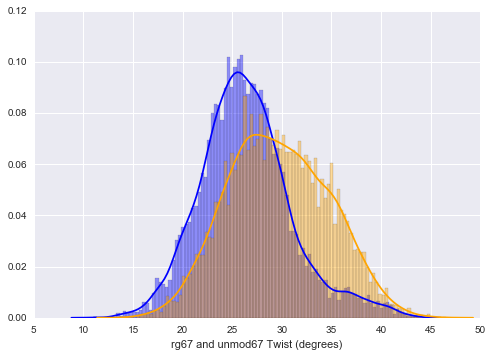

In [23]:
fig, ax = plt.subplots()
sns.distplot(df['rg67'],bins=100, color='blue')
sns.distplot(df['unmod67'],bins=100,color='orange')
ax.set_xlabel("rg67 and unmod67 Twist (degrees)")

# Preview the lesion step

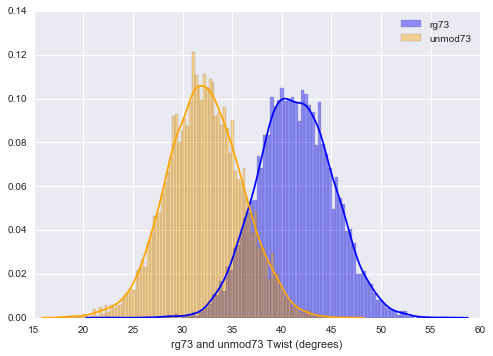

In [24]:
fig, ax = plt.subplots()
#data69=df[['rg69','unmod69']]
sns.distplot(df['rg73'], bins=100, color='blue',label='rg73')
sns.distplot(df['unmod73'], bins=100, color='orange',label='unmod73')
plt.legend()
ax.set_xlabel("rg73 and unmod73 Twist (degrees)")

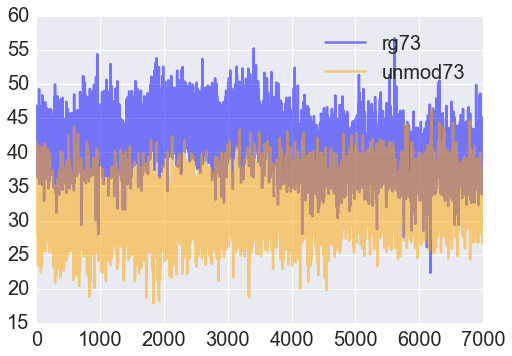

In [29]:
df_73=df[['rg73','unmod73']]
df_73.plot(alpha=0.5, color=["blue","orange"])

# I am going to define a function for this plot so that I can apply to all plots 

In [27]:
def histplot(step):
    rg='rg'+str(step)
    unmod='unmod'+str(step)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.distplot(df[rg],bins=100,color='blue',label=rg)
    sns.distplot(df[unmod],bins=100,color='orange',label=unmod)
    plt.legend()
    
    sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
    ax.set_xlabel(rg +" and " + unmod + " twist in degrees")
    plt.savefig("./twist_plots/twist_hist_"+str(step)+".png")

## let's enumerate all steps

67
68
69
70
71
72
73
74
75
76
77
78


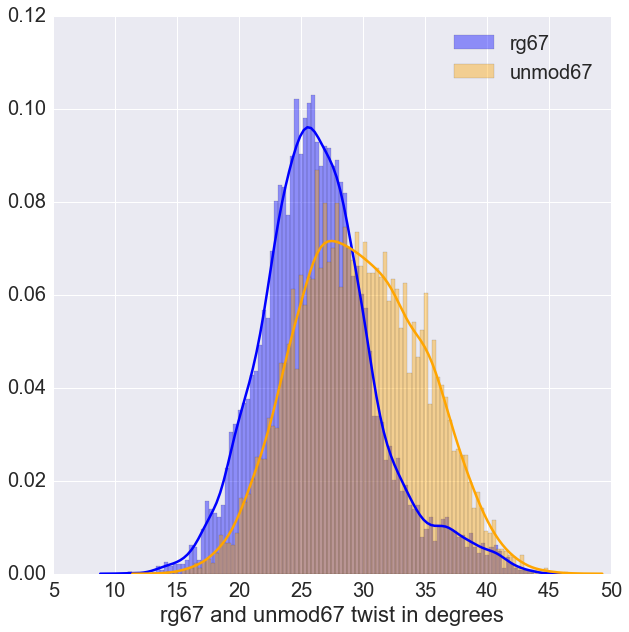

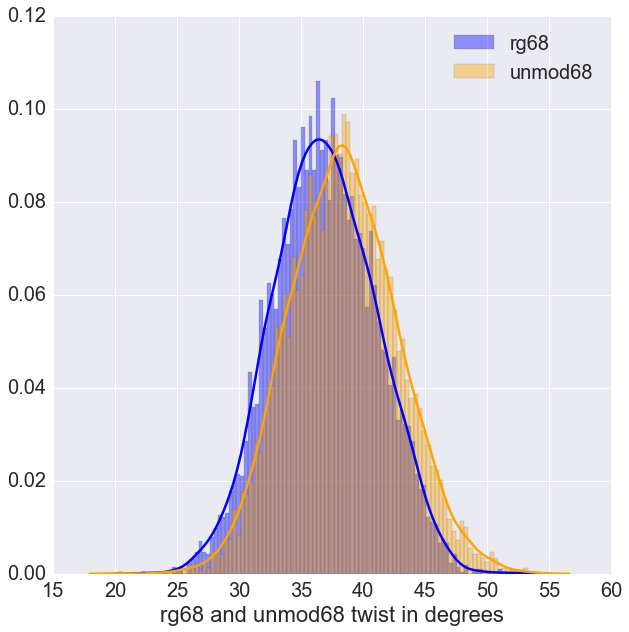

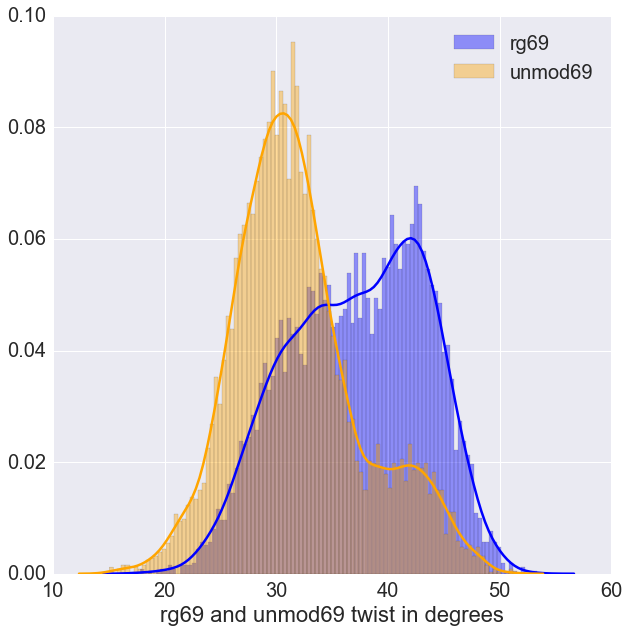

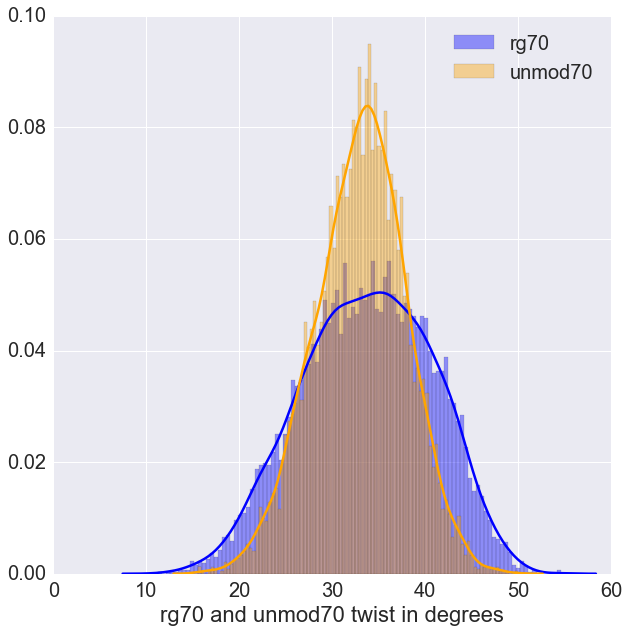

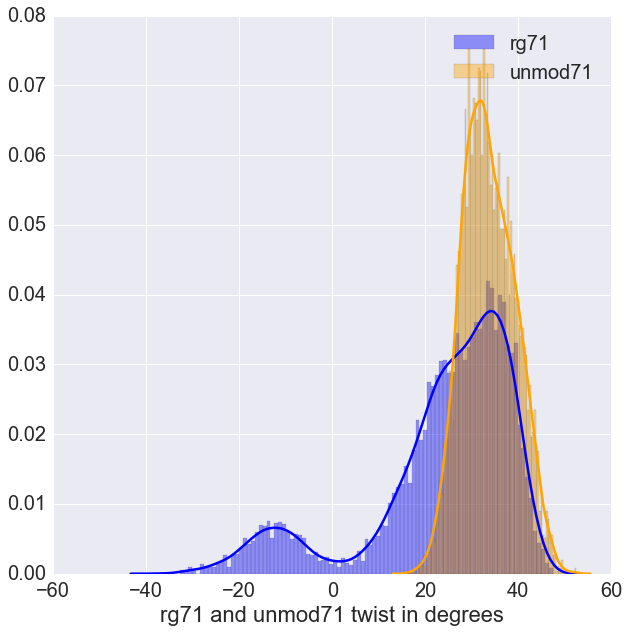

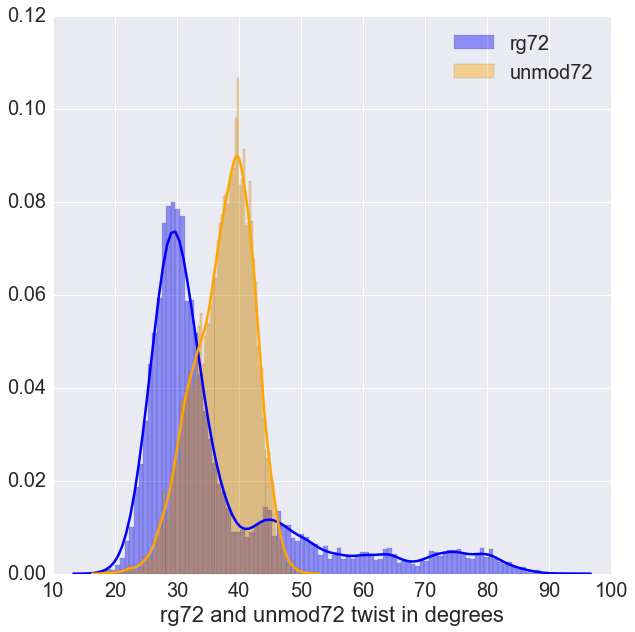

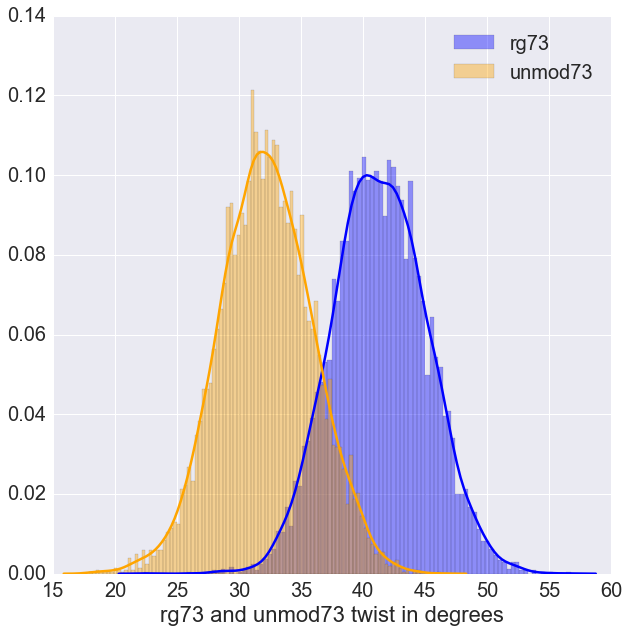

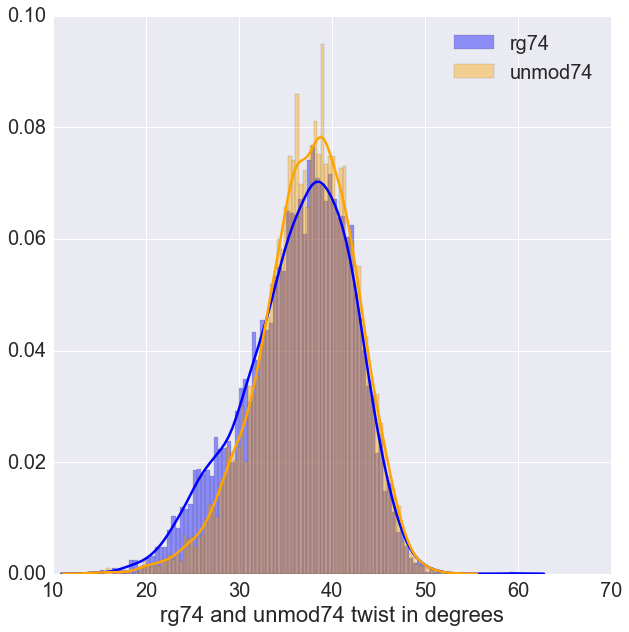

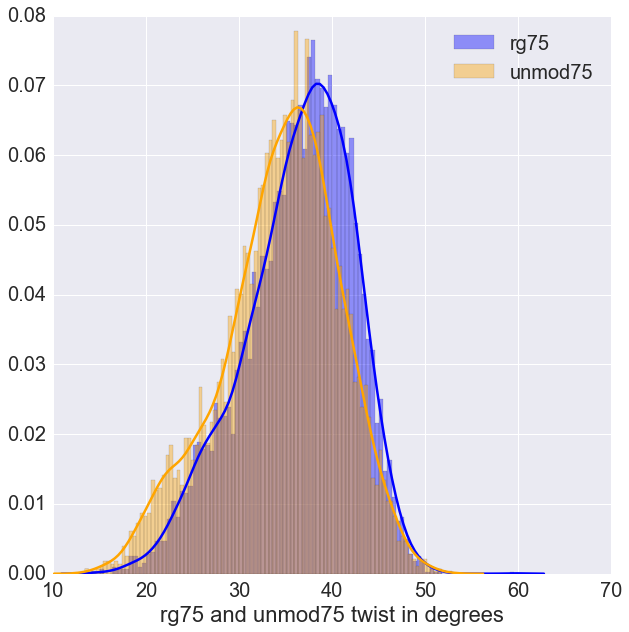

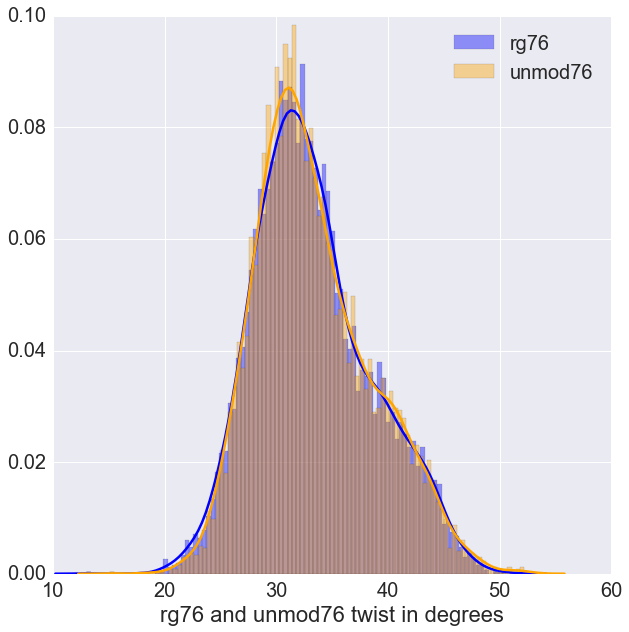

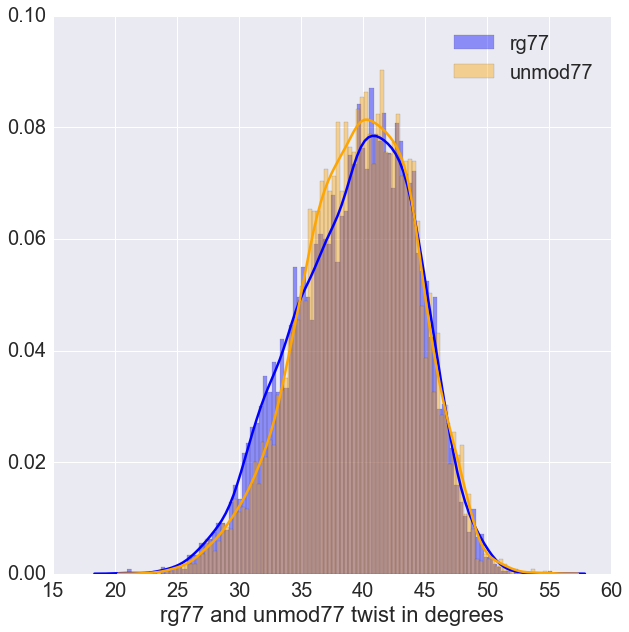

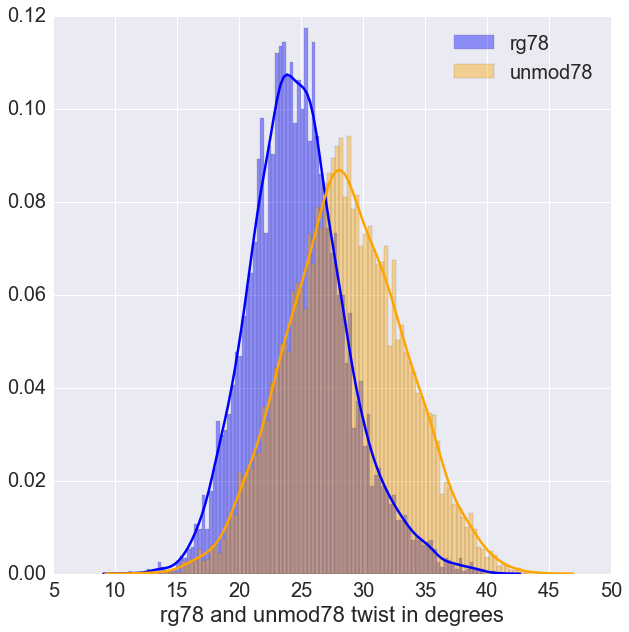

In [30]:
for i in range(67,79):
    print i
    histplot(i)